<a href="https://colab.research.google.com/github/MWestberg3/bias-checker/blob/mwestberg%2Fdata_preprocessing/bias_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [3]:
import pandas as pd
import kagglehub as kh
import os

path = kh.dataset_download("subhankarpanda56/news-bias")

print("Path to dataset: ", path)

100%|██████████| 110M/110M [00:06<00:00, 19.0MB/s]

Extracting files...


Path to dataset:  /root/.cache/kagglehub/datasets/subhankarpanda56/news-bias/versions/1


In [4]:
# Find the CSV file within the downloaded directory:
for filename in os.listdir(path):
  if filename.endswith(".csv"):
    csv_file_path = os.path.join(path, filename)
    break # Stop after finding the first CSV file


bias_raw_df = pd.read_csv(csv_file_path)
bias_raw_df.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,terrorism,New York Times - News,0,http://www.nytimes.com/2016/09/20/nyregion/ahm...,"Bomb Suspect Changed After Trip Abroad, Friend...",2016-09-20,N. R. Kleinfield,"Besides his most recent trip to Quetta , Mr. R...","Besides his most recent trip to Quetta, Mr. Ra...",www.nytimes.com,left,004Gt3gcsotuiYmz
1,supreme_court,Vox,0,https://www.vox.com/policy-and-politics/2018/9...,Why Susan Collins claims she’s being bribed ov...,2018-09-12,"Emily Stewart, Terry Nguyen, Rebecca Jennings,...",Is Maine Republican Sen. Susan Collins being b...,Is Maine Republican Sen. Susan Collins being b...,www.vox.com,left,00eP4XD3VdMmHITE
2,education,Ezra Klein,0,http://www.npr.org/blogs/thetwo-way/2014/05/06...,Poll: Prestigious Colleges Won't Make You Happ...,2014-05-06,Anya Kamenetz,Poll : Prestigious Colleges Wo n't Make You Ha...,Poll: Prestigious Colleges Won't Make You Happ...,www.npr.org,left,00FTGIZEd6B8zQ4U
3,us_house,Breitbart News,2,http://www.breitbart.com/big-government/2017/0...,Paul Ryan Reportedly Says No Chance for Border...,2017-09-12,Ian Mason,"House Speaker Paul Ryan , at a private dinner ...","House Speaker Paul Ryan, at a private dinner e...",www.breitbart.com,right,00HGGqBRf1kzPRlg
4,white_house,Guest Writer - Left,0,https://www.cnn.com/2019/07/11/politics/donald...,OPINION: Trump seeking change of legal fortune...,2019-07-11,Analysis Stephen Collinson,( CNN ) President Donald Trump has reason to h...,(CNN) President Donald Trump has reason to hop...,www.cnn.com,left,00IzI5ynahBVtC9l


In [3]:
len(bias_raw_df)

37554

<Axes: ylabel='ID'>

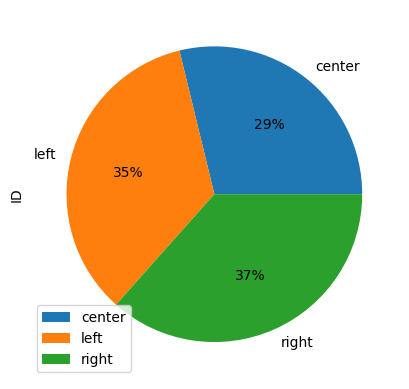

In [5]:
bias_raw_df.groupby('bias_text').count().plot(kind='pie', y='ID', autopct='%1.0f%%')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bias_raw_df['content_original'], bias_raw_df['bias_text'], test_size=0.2, random_state=42)

In [7]:
X_train[0]

'Besides his most recent trip to Quetta, Mr. Rahami visited Karachi, Pakistan, in 2005. Both of those cities’ reputations have become entwined with the militant groups who have sheltered there: Karachi as a haven for the Pakistani Taliban and Al Qaeda, and Quetta as the headquarters of the exiled Afghan Taliban leadership. But both cities are also home to generations of Afghans who have fled violence in their home country.\n\nMuch about his New Jersey life did seem unremarkable. Amarjit Singh, a limousine driver, was friends with Mr. Rahami at Edison High School. The person he knew, he said, was a determined student with an abundance of friends and a string of girlfriends. “Everyone seemed to like him,” he said. “Smart, funny, humble.”\n\nHe viewed the teenage Mr. Rahami as the prototypical immigrant, teetering between two worlds. While he wore jeans and sweatshirts like his friends and worked at a Pathmark supermarket after school, he preferred Afghan music and prayed at the mosque on

# NLTK Pre-processing

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Tokenization
X_token_train = [word_tokenize(line)[:100] for line in X_train]
X_token_test = [word_tokenize(line)[:100] for line in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
print(X_token_train[0])

['Washington', 'What', 'does', 'the', 'future', 'have', 'in', 'store', 'for', 'us', 'if', 'Congress', 'succeeds', 'in', 'impeaching', 'President', 'Donald', 'Trump', ',', 'the', 'president', 'who', 'presides', 'over', 'the', 'best', 'economy', 'America', 'has', 'had', 'in', 'the', 'last', '50', 'years', '?', 'I', 'think', 'you', 'can', 'look', 'to', 'South', 'America', 'for', 'a', 'glimpse', 'of', 'the', 'Great', 'Republic', 'that', 'will', 'be', 'vouchsafed', 'us', 'by', 'the', 'congressgirls', 'from', 'what', 'is', 'called', '“', 'the', 'Squad', '”', 'and', 'from', 'the', 'most', 'foul-mouthed', 'field', 'of', 'Democratic', 'candidates', 'ever', 'to', 'run', 'for', 'the', 'presidency', '.', 'Already', 'the', 'Democratic', 'National', 'Committee', 'has', 'asked', 'the', 'candidates', 'to', 'avoid', 'crude', 'back-alley', 'language', 'in', 'their', 'debates']


In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemma_X_train = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_train]
lemma_X_test = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_test]
print(lemma_X_train[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Washington', 'What', 'doe', 'the', 'future', 'have', 'in', 'store', 'for', 'u', 'if', 'Congress', 'succeeds', 'in', 'impeaching', 'President', 'Donald', 'Trump', ',', 'the', 'president', 'who', 'presides', 'over', 'the', 'best', 'economy', 'America', 'ha', 'had', 'in', 'the', 'last', '50', 'year', '?', 'I', 'think', 'you', 'can', 'look', 'to', 'South', 'America', 'for', 'a', 'glimpse', 'of', 'the', 'Great', 'Republic', 'that', 'will', 'be', 'vouchsafed', 'u', 'by', 'the', 'congressgirls', 'from', 'what', 'is', 'called', '“', 'the', 'Squad', '”', 'and', 'from', 'the', 'most', 'foul-mouthed', 'field', 'of', 'Democratic', 'candidate', 'ever', 'to', 'run', 'for', 'the', 'presidency', '.', 'Already', 'the', 'Democratic', 'National', 'Committee', 'ha', 'asked', 'the', 'candidate', 'to', 'avoid', 'crude', 'back-alley', 'language', 'in', 'their', 'debate']


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
clear_X_train = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_train]
clear_X_test = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_test]
print(clear_X_train[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Washington', 'What', 'doe', 'future', 'store', 'u', 'Congress', 'succeeds', 'impeaching', 'President', 'Donald', 'Trump', ',', 'president', 'presides', 'best', 'economy', 'America', 'ha', 'last', '50', 'year', '?', 'I', 'think', 'look', 'South', 'America', 'glimpse', 'Great', 'Republic', 'vouchsafed', 'u', 'congressgirls', 'called', '“', 'Squad', '”', 'foul-mouthed', 'field', 'Democratic', 'candidate', 'ever', 'run', 'presidency', '.', 'Already', 'Democratic', 'National', 'Committee', 'ha', 'asked', 'candidate', 'avoid', 'crude', 'back-alley', 'language', 'debate']


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiate a tfidf vectorizer object
vectorizer = TfidfVectorizer(preprocessor=' '.join)
# Fitting the training dataset and transform it
X_train_tfidf = vectorizer.fit_transform(clear_X_train)
# Transform the test dataset
X_test_tfidf = vectorizer.transform(clear_X_test)

print(X_train_tfidf.shape)

(30043, 52460)


In [19]:
print(X_train_tfidf[0])

  (0, 25356)	0.07893613706089225
  (0, 25544)	0.10506692920870823
  (0, 33134)	0.10529756637312292
  (0, 35884)	0.11985895968144258
  (0, 48473)	0.14524349898440292
  (0, 6275)	0.0840494144638427
  (0, 48766)	0.21086871568636933
  (0, 37692)	0.18941882353165473
  (0, 18965)	0.049660962729997975
  (0, 7870)	0.06225912726842744
  (0, 24118)	0.05014663902931318
  (0, 43722)	0.06946947673640935
  (0, 43728)	0.21086871568636933
  (0, 28302)	0.1171871558941824
  (0, 33587)	0.10568708422564219
  (0, 2365)	0.18282443662448963
  (0, 36625)	0.10180682033187166
  (0, 39221)	0.07749484932208506
  (0, 1022)	0.12124220065462495
  (0, 52373)	0.062222290938514065
  (0, 49642)	0.10072673563558326
  (0, 39740)	0.10753903186045838
  (0, 22375)	0.11134685039669204
  (0, 36162)	0.18438317738406382
  (0, 10635)	0.14243901485442587
  (0, 20065)	0.16248452740738095
  (0, 51668)	0.2485448248627763
  (0, 30765)	0.2485448248627763
  (0, 29289)	0.09337032672874856
  (0, 22515)	0.21333515086857732
  (0, 35624)	0.1